In [1]:
## Import libraries

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer

In [2]:
## 5 first lines

df = pd.read_csv("Speed_Dating_Data.csv",encoding= 'unicode_escape')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
## Columns name

df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [5]:
pd.set_option('display.max_rows', 500)

In [6]:
# counting null values
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [7]:
# narrowing dataset
dating_1 = df.iloc[:, 11:28]
dating_2 = df.iloc[:, 30:35]
dating_3 = df.iloc[:, 39:43]
dating_4 = df.iloc[:, 45:67]
dating_5 = df.iloc[:, 69:74]
dating_6 = df.iloc[:, 87:91]
dating_7 = df.iloc[:, 97:102]
dating_8 = df.iloc[:, 104:107]

df = pd.concat([df.iloc[:, 0],df.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [8]:
df

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
0,1,0,11.0,0,0.14,0,27.0,2.0,35.0,20.0,...,8.0,8.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,1,0,12.0,0,0.54,0,22.0,2.0,60.0,0.0,...,8.0,8.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,1,0,13.0,1,0.16,1,22.0,4.0,19.0,18.0,...,8.0,8.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,1,0,14.0,1,0.61,0,23.0,2.0,30.0,5.0,...,8.0,8.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,1,0,15.0,1,0.21,0,24.0,3.0,30.0,10.0,...,8.0,8.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,526.0,0,0.64,0,26.0,3.0,10.0,10.0,...,6.0,7.0,0,3.0,5.0,5.0,5.0,2.0,5.0,0.0
8374,552,1,527.0,0,0.71,0,24.0,6.0,50.0,20.0,...,6.0,7.0,0,4.0,6.0,8.0,4.0,4.0,4.0,0.0
8375,552,1,528.0,0,-0.46,0,29.0,3.0,40.0,10.0,...,6.0,7.0,0,4.0,7.0,8.0,8.0,6.0,5.0,0.0
8376,552,1,529.0,0,0.62,0,22.0,4.0,10.0,25.0,...,6.0,7.0,0,4.0,6.0,5.0,4.0,5.0,5.0,0.0


In [9]:
df = df.dropna()

<AxesSubplot:title={'center':'Correlation Heatmap'}>

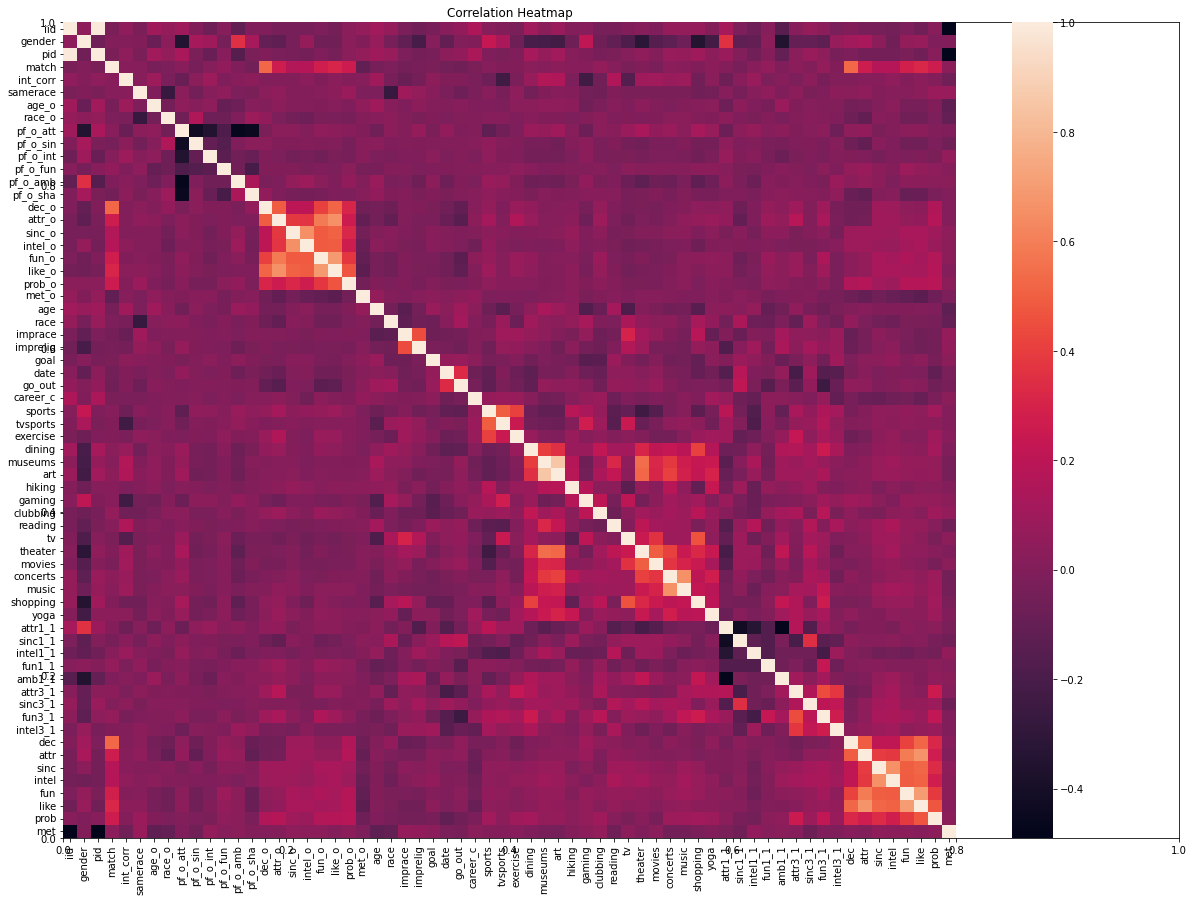

In [10]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

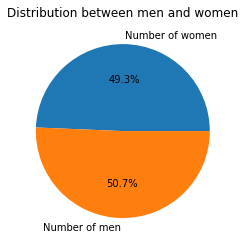

In [11]:
##Show the distribution of the number of women and men in the dataset

##Calculate the number of people on the dataset
number_of_persons = len(df.iid.unique())

##Women
df_women = df[df.gender == 0]
number_of_women = len(df_women.iid.unique())

##Men
df_men = df[df.gender == 1]
number_of_men = len(df_men.iid.unique())

## Graph :
labels = 'Number of women', "Number of men"
sizes = [number_of_women, number_of_men]
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.set_title('Distribution between men and women')
plt.show()

In [12]:
## We see that there is a balanced distribution between the number of men and women


In [13]:
## Create dataset with id then split by gender

dataset_unique = df.drop_duplicates(subset = ["iid"])
dataset_unique_femmes = dataset_unique[dataset_unique.gender == 0]
dataset_unique_hommes = dataset_unique[dataset_unique.gender == 1]

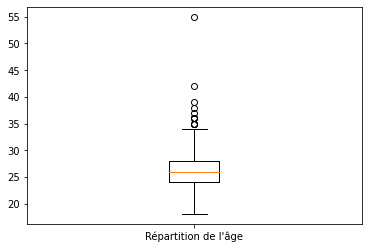

In [14]:
##Show the age distribution in the dataset

## Select age in dataset
age_dataset = dataset_unique.age

## Replace nan by mean
age_dataset = age_dataset.fillna(age_dataset.mean())

# Graph
plt.boxplot(age_dataset, labels=["Répartition de l'âge"])
plt.show()

In [15]:
## Mean age between 19 and 35

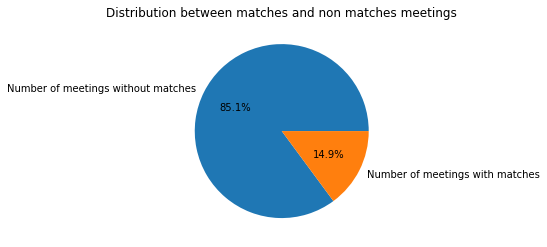

In [17]:
##Number of matches by meeting

nbre_de_recnontres = len(df)
nbre_de_matchs = df.match.sum()

## Graph :
labels = 'Number of meetings without matches', "Number of meetings with matches"
sizes = [nbre_de_recnontres, nbre_de_matchs]
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.set_title('Distribution between matches and non matches meetings')
plt.show()

In [11]:
## For 10 meetings there are between 1 and 2 matches

In [18]:
## Career : visualize different jobs and distribution by gender
## Men

longueur_carrière_hommes = []
for i in range(18) :
    a = len(dataset_unique_hommes[dataset_unique_hommes.career_c == i])
    longueur_carrière_hommes.append(a)

In [19]:
## Women

longueur_carrière_femmes = []

for i in range(18) :
    b = len(dataset_unique_femmes[dataset_unique_femmes.career_c == i])
    longueur_carrière_femmes.append(b)

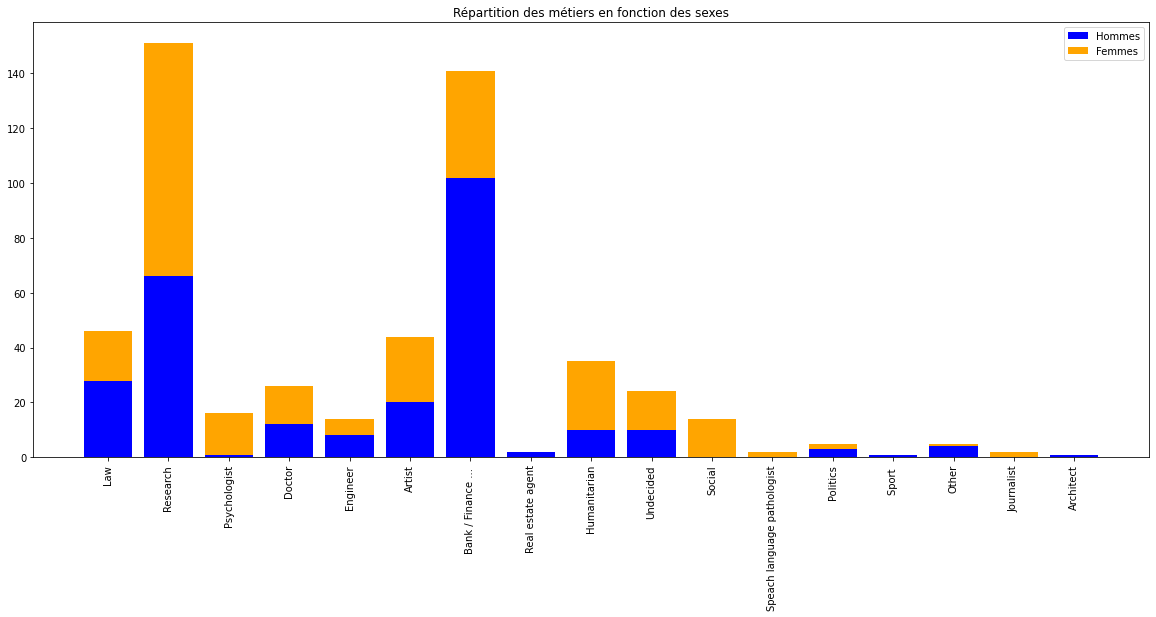

In [20]:
# Graph
longueur_carrière_hommes = longueur_carrière_hommes[1:]
longueur_carrière_femmes = longueur_carrière_femmes[1:]

names = ["Law","Research","Psychologist","Doctor","Engineer","Artist","Bank / Finance ... ","Real estate agent","Humanitarian","Undecided","Social","Speach language pathologist","Politics","Sport ","Other","Journalist","Architect"]
plt.subplots(figsize=(20, 8))
plt.bar(names, longueur_carrière_hommes, color = "blue")
plt.bar(names, longueur_carrière_femmes, bottom = longueur_carrière_hommes, color = "orange")
plt.title("Répartition des métiers en fonction des sexes")
plt.xticks(rotation= 90)
plt.legend(["Hommes", "Femmes"])
plt.show()

In [15]:
## There are a total of 17 jobs represented (with the categories Other and Undecided): some jobs are highly represented (Researcher and Banker).
## In terms of distribution of men and women, it is almost equal in very few professions (Lawyer, Doctor). Others have flagrant imbalances (Banking, Social, Psychologist)

In [21]:
## Average scores for each activity separated into male and female datasets

Moyenne_activité_hommes = dataset_unique_hommes[["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga"]].mean()
Moyenne_activité_femmes = dataset_unique_femmes[["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga"]].mean()

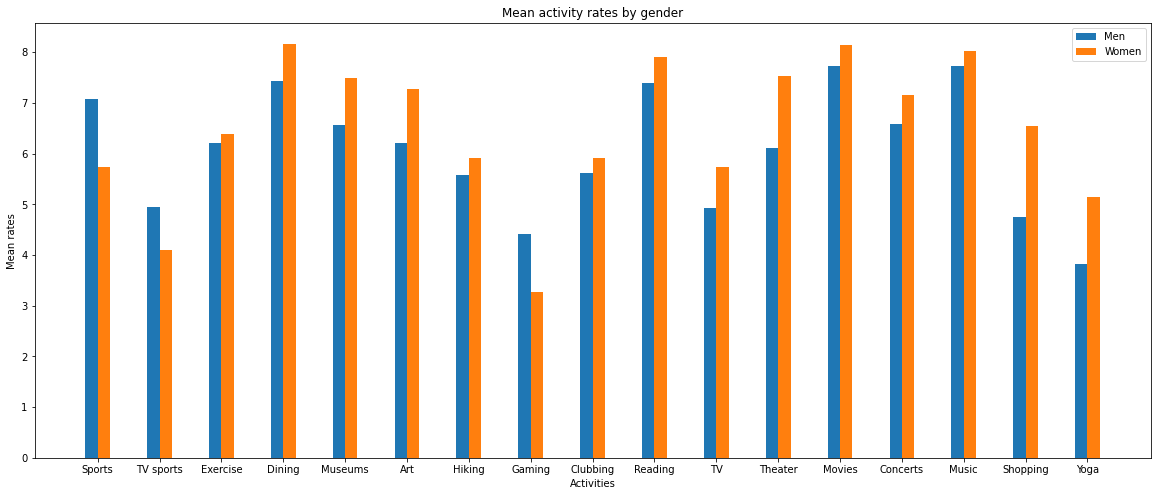

In [23]:
## Graph

labels = ["Sports","TV sports","Exercise","Dining","Museums","Art","Hiking","Gaming","Clubbing","Reading","TV","Theater","Movies","Concerts","Music","Shopping","Yoga"]

x = np.arange(len(labels))

width = 0.20

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width/2, Moyenne_activité_hommes, width, label='Men')
rects2 = ax.bar(x + width/2, Moyenne_activité_femmes, width,label='Women')

plt.xlabel("Activities")
plt.ylabel("Mean rates")
ax.set_xticks(x, labels)
plt.title("Mean activity rates by gender")
plt.legend()
plt.show()

In [24]:
## In terms of activities, women rated 14 times higher than men (out of 17 activities).
## The three activities that men prefer are Sports, TV Sports and Gaming. The three activities that women rated much higher than men were: Shopping, Theater, Yoga

In [25]:
## Match by race

##Replace numbers by there meanings
race_replacement={1:"Black/African American",
                 2: "European/Caucasion-American",
                 3: "Latino/Hispanic American",
                 4: "Asian/Pacific Islander/Asian-American",
                 5: "Native American",
                 6: "Other"}
df["race"].replace(race_replacement, inplace=True)

## Matches by race
match_origines = df.groupby(['race'])['match'].agg('sum')

nb_asian_match = match_origines["Asian/Pacific Islander/Asian-American"]
nb_black_match = match_origines["Black/African American"]
nb_euro_match = match_origines["European/Caucasion-American"]
nb_latino_match = match_origines["Latino/Hispanic American"]
#nb_ame_match = match_origines["Native American"]
nb_other_match = match_origines["Other"]

## Total people by races
nb_asian = len(dataset_unique[dataset_unique.race == 4])
nb_black = len(dataset_unique[dataset_unique.race == 1])
nb_euro = len(dataset_unique[dataset_unique.race == 2])
nb_latino = len(dataset_unique[dataset_unique.race == 3])
nb_ame = len(dataset_unique[dataset_unique.race == 5])
nb_other = len(dataset_unique[dataset_unique.race == 6])

## Ratio
Ratio_asian = nb_asian_match / nb_asian
Ratio_black = nb_black_match / nb_black
Ratio_euro = nb_euro_match / nb_euro
Ratio_latino = nb_latino_match / nb_latino
Ratio_other = nb_other_match / nb_other

## Number "samerace" by race
somme_samerace_asian = df[df.race == "Asian/Pacific Islander/Asian-American"].samerace.sum()
somme_samerace_black = df[df.race == "Black/African American"].samerace.sum()
somme_samerace_european = df[df.race == "European/Caucasion-American"].samerace.sum()
somme_samerace_latino = df[df.race == "Latino/Hispanic American"].samerace.sum()
somme_samerace_other = df[df.race == "Other"].samerace.sum()

##Ratio "samerace"
Ratio_samerace_asian = somme_samerace_asian/nb_asian
Ratio_samerace_black = somme_samerace_black/nb_black
Ratio_samerace_european = somme_samerace_european/nb_euro
Ratio_samerace_latino = somme_samerace_latino/nb_latino
Ratio_samerace_other = somme_samerace_other/nb_other

C:\Users\victo\AppData\Local\Temp\ipykernel_4356\3513893318.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["race"].replace(race_replacement, inplace=True)


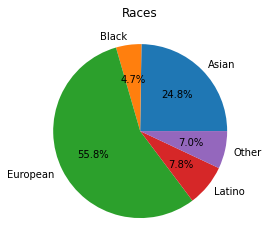

In [26]:
## Distribution race

labels = 'Asian', "Black","European","Latino","Other"
sizes = [nb_asian, nb_black,nb_euro,nb_latino,nb_other]

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.set_title('Races')
plt.show()

In [27]:
## Distribution of origins largely dominated by European and Asian origin 

<AxesSubplot:title={'center':'Race importance for a match'}, xlabel='race'>

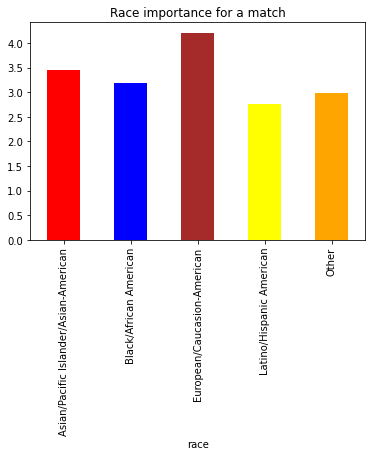

In [29]:
## Importance of race according to the race

imprace_total =  df.groupby(['race'])['imprace'].agg('mean')
color = ["red", "blue","brown","yellow","orange"]
imprace_total.plot(kind = 'bar', title='Race importance for a match',color=color)

In [30]:
## There were no major differences in the importance of the origin of the person met. 
## However, we can see that people of European origin have the highest score and people of Latin origin the lowest.

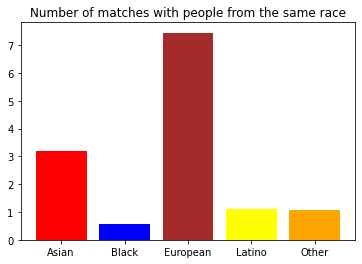

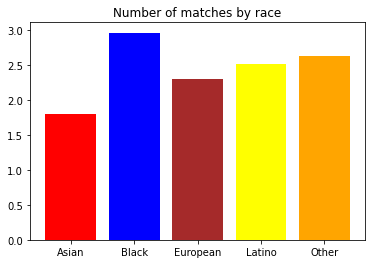

In [36]:
names = ['Asian', 'Black', 'European', "Latino", "Other"]
values = [Ratio_asian, Ratio_black, Ratio_euro, Ratio_latino, Ratio_other]

names2 = ['Asian', 'Black', 'European', "Latino", "Other"]
values2 = [Ratio_samerace_asian, Ratio_samerace_black, Ratio_samerace_european, Ratio_samerace_latino, Ratio_samerace_other]

# Graph

#plt.subplots(222)
plt.bar(names2, values2, color = ["red", "blue","brown","yellow","orange"], )
plt.title("Number of matches with people from the same race")
plt.show()

#plt.subplots(223)
plt.bar(names, values, color = ["red", "blue","brown","yellow","orange"], )
plt.title("Number of matches by race")
plt.show()

In [32]:
## Number of matches per person with the same origin that matches the distribution of the origins of the total population.
## When we do a ratio we see that the origins don't have a big influence even if the black category (the highest) has on average one match more than the Asian category (the lowest) 

In [33]:
## The objective is to see which qualities are most sought after in the partner and which qualities get the most matches.

In [42]:
## Average attributes sought by men and women

H_recherche_attractivite = dataset_unique_hommes.attr1_1.mean()
H_recherche_sincere = dataset_unique_hommes.sinc1_1.mean()
H_recherche_intel = dataset_unique_hommes.intel1_1.mean()
H_recherche_fun = dataset_unique_hommes.fun1_1.mean()
H_recherche_ambition = dataset_unique_hommes.amb1_1.mean()
#H_recherche_partage = dataset_unique_hommes.shar1_1.mean()

F_recherche_attractivite = dataset_unique_femmes.attr1_1.mean()
F_recherche_sincere = dataset_unique_femmes.sinc1_1.mean()
F_recherche_intel = dataset_unique_femmes.intel1_1.mean()
F_recherche_fun = dataset_unique_femmes.fun1_1.mean()
F_recherche_ambition = dataset_unique_femmes.amb1_1.mean()
#F_recherche_partage = dataset_unique_femmes.shar1_1.mean()

## Average attributes given to oneself when there is a match

df_match = df[df.match == 1]
df_match_hommes = df_match[df_match.gender == 1]
df_match_femmes = df_match[df_match.gender == 0]

##Mean men
H_auto_attractivite = df_match_hommes.attr3_1.mean()
H_auto_sincere = df_match_hommes.sinc3_1.mean()
H_auto_intel = df_match_hommes.intel3_1.mean()
H_auto_fun = df_match_hommes.fun3_1.mean()
#H_auto_ambition = df_match_hommes.amb3_1.mean()

## Mean women
F_auto_attractivite = df_match_femmes.attr3_1.mean()
F_auto_sincere = df_match_femmes.sinc3_1.mean()
F_auto_intel = df_match_femmes.intel3_1.mean()
F_auto_fun = df_match_femmes.fun3_1.mean()
#F_auto_ambition = df_match_femmes.amb3_1.mean()

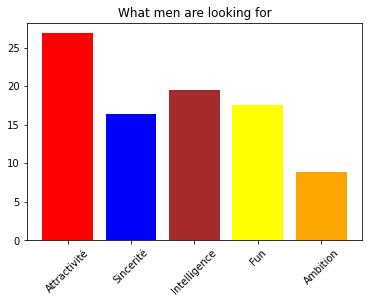

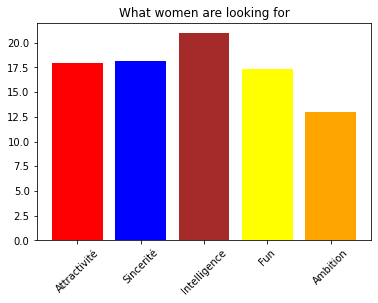

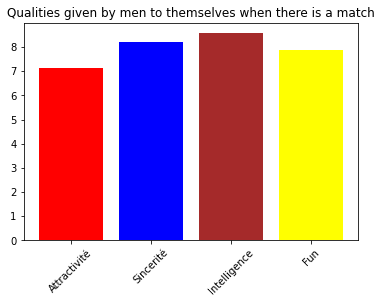

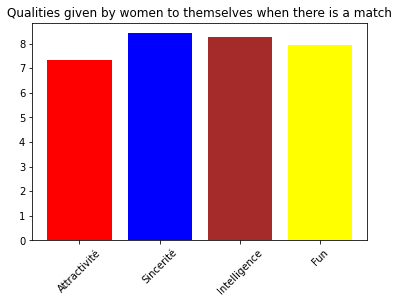

In [46]:
names = ['Attractivité', 'Sincerité', 'Intelligence', "Fun", "Ambition"]
names2 = ['Attractivité', 'Sincerité', 'Intelligence', "Fun"]
values1 = [H_recherche_attractivite, H_recherche_sincere, H_recherche_intel, H_recherche_fun, H_recherche_ambition]
values2 = [F_recherche_attractivite, F_recherche_sincere, F_recherche_intel, F_recherche_fun, F_recherche_ambition]
values3 = [H_auto_attractivite, H_auto_sincere, H_auto_intel, H_auto_fun ]
values4 = [F_auto_attractivite, F_auto_sincere, F_auto_intel, F_auto_fun]

# Graph
plt.bar(names, values1, color = ["red", "blue","brown","yellow","orange","purple"])
plt.title("What men are looking for")
plt.xticks(rotation= 45)
plt.show()

plt.bar(names, values2, color = ["red", "blue","brown","yellow","orange","purple"])
plt.title("What women are looking for")
plt.xticks(rotation= 45)
plt.show()

plt.bar(names2, values3, color = ["red", "blue","brown","yellow"])
plt.title("Qualities given by men to themselves when there is a match")
plt.xticks(rotation= 45)
plt.show()

plt.bar(names2, values4, color = ["red", "blue","brown","yellow"])
plt.title("Qualities given by women to themselves when there is a match")
plt.xticks(rotation= 45)
plt.show()

In [29]:
## We observe that men are mostly looking for attractiveness, then intelligence, and are less interested in ambition
## We observe that women are mostly looking for intelligence (2nd sincerity)


## The objective is to see if when there are matches they follow the observations made in the first two graphs

## For women there is a kind of logic since the categories that stand out the most for men who have matches are intelligence and sincerity (but no very significant difference)
## For men, this does not correspond with what they are looking for since the two main qualities that stand out are also intelligence and sincerity (moderately sought after by men).

## On the other hand, we can see that in both cases, sincerity and intelligence stand out: we can say that these are the two main qualities to have to match.

In [30]:
## The goal of this next graph is to know if when people have a precise idea of objective during this speed dating, they have more or less chances to match

In [47]:
# Replace numbers by meanings

goal={1:"Seemed like a fun night out",
                 2: "To meet new people",
                 3: "To get a date",
                 4: "Looking for a serious relationship",
                 5: "To say I did it",
                 6: "Other"}
df["goal"].replace(goal, inplace=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_4356\3334272226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["goal"].replace(goal, inplace=True)


In [48]:
dataset_unique = df.drop_duplicates(subset = ["iid"]);
dataset_match = df[df.match ==1]
dataset_non_match = df[df.match ==0]
longueur_dataset = len(dataset_unique)
longueur_dataset_match = len(dataset_match)
longueur_dataset_non_match = len(dataset_non_match)

In [49]:
# Find the proportion of the goal of each participant

goal_liste = ["Seemed like a fun night out","To meet new people","To get a date","Looking for a serious relationship","To say I did it","Other"]
goal_total = []
for i in goal_liste :
    a = len(dataset_unique[dataset_unique.goal == i])
    goal_total.append(a)
    
quotients_total = []
for number in goal_total:
    quotients_total.append(number / longueur_dataset)

print(quotients_total)

[0.4215500945179584, 0.34782608695652173, 0.07372400756143667, 0.04158790170132325, 0.0661625708884688, 0.04914933837429111]


In [50]:
# Find the proportion of the goal of each participant when they match

goal_liste = ["Seemed like a fun night out","To meet new people","To get a date","Looking for a serious relationship","To say I did it","Other"]
goal_total_match = []
for i in goal_liste :
    a = len(dataset_match[dataset_match.goal == i])
    goal_total_match.append(a)
    
quotients_match = []
for number in goal_total_match:
    quotients_match.append(number / longueur_dataset_match)

print(quotients_match)

[0.43265993265993263, 0.3611111111111111, 0.07154882154882154, 0.03787878787878788, 0.06228956228956229, 0.034511784511784514]


In [51]:
# Find the proportion of the goal of each participant when they do not match

goal_liste = ["Seemed like a fun night out","To meet new people","To get a date","Looking for a serious relationship","To say I did it","Other"]
goal_total__non_match = []
for i in goal_liste :
    a = len(dataset_non_match[dataset_non_match.goal == i])
    goal_total__non_match.append(a)
    
quotients_non_match = []
for number in goal_total__non_match:
    quotients_non_match.append(number / longueur_dataset_non_match)

print(quotients_non_match)

[0.4096986985202353, 0.3681583169905509, 0.07666250668568372, 0.036726689249420574, 0.06150829024781601, 0.04724549830629346]


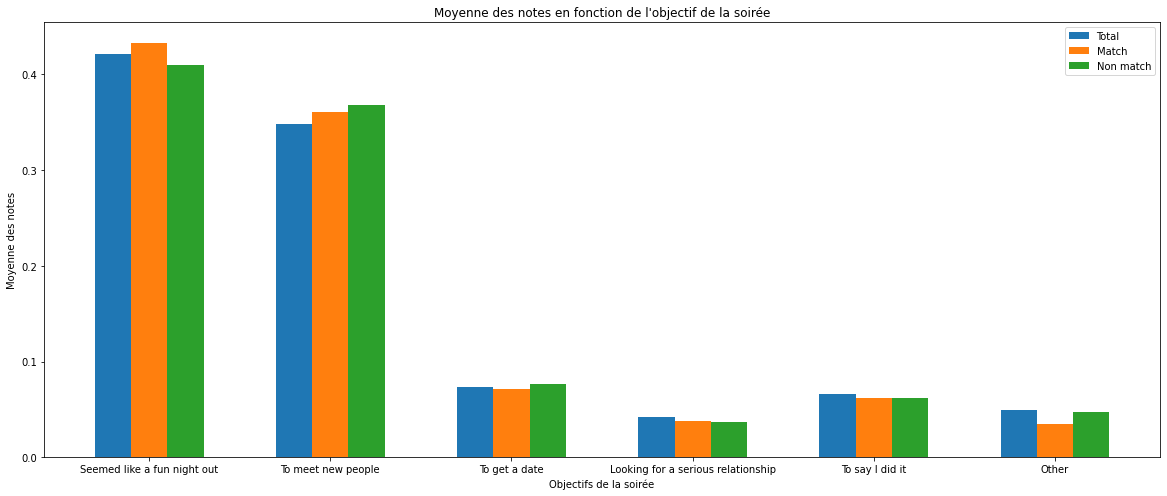

In [52]:
# Graph

labels = ["Seemed like a fun night out","To meet new people","To get a date","Looking for a serious relationship","To say I did it","Other"]

x = np.arange(len(labels))

width = 0.2

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width,quotients_total , width, label='Total')
rects2 = ax.bar(x, quotients_match, width,label='Match')
rects3 = ax.bar(x + width, quotients_non_match, width,label='Non match')


plt.xlabel("Objectifs de la soirée")
plt.ylabel("Moyenne des notes")
ax.set_xticks(x, labels)
plt.title("Moyenne des notes en fonction de l'objectif de la soirée")
plt.legend()
plt.show()

In [37]:
## We can see that the majority of responses are "It looked like a fun night" and "To meet new people".

## There was no difference between those who matched and those who did not for any of the objectives of coming to this event.
## We would expect that people who matched would score higher on the "date" objective but this is not the case.

## We can therefore say that whatever the objective with which the person came to this speed dating evening, it did not influence his propensity to get a match.